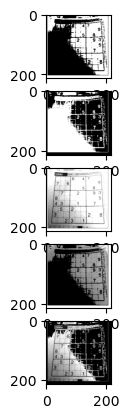

In [1]:
'''
image segmentation is to modify the representation of an image into another thatis easier to process
extracting objects from the background based on color and edges etc
Thresholding is easiest form of image segmentation based on intensity values
is a point operation - on single channel img
Global Thresholding - one value is used for all pixel as a threshold eg manual,Otsu,Triangle
Adaptive Thresholding - an img is breaken into tiles and these tiles are thresholded with various thresholds
Variants of thresholding:
1)Thresh_binary
2)Thresh_binary_inv
3)Thresh_trunc-above thresh become max and others remain zero
4)Thresh_tozero-below become zero above remain same\
5_Thresh_tozero_inv
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('sudoko.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(gray, 120,255, cv2.THRESH_BINARY)
ret, binInv = cv2.threshold(gray, 120,255, cv2.THRESH_BINARY_INV)
ret, trunc = cv2.threshold(gray, 120,255, cv2.THRESH_TRUNC)
ret, zero = cv2.threshold(gray, 120,255, cv2.THRESH_TOZERO)
ret, zeroInv = cv2.threshold(gray, 120,255, cv2.THRESH_TOZERO_INV)
t = [thresh, binInv, trunc, zero, zeroInv]
fig, ax = plt.subplots(5,1)
for count,i in enumerate(t):
    ax[count].imshow(i, cmap = 'gist_gray')
plt.show()
cv2.imshow('Original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
'''Adaptive Thresholding - when img is not in proper lighting
thresh is calculated either by mean or by gaussian
1)mean - calc mean and minus c parameter
2)gaussian - gaussian weighted sum of blocksize and minus c para
c is the number of impurities that are minused
'''
img=cv2.imread("sudoko.jpg",cv2.IMREAD_GRAYSCALE)
mean_thresh=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,3)
cv2.imshow('mean thresholding',mean_thresh)
gaussian_thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3)
cv2.imshow('gaussian thresholding',gaussian_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [3]:
'''
1)OTSU- is applied on those imgs which are bimodal in histogram
threshold is the value that minimizes within class variance.
for each pixel it considers the right side including itself as foreground and the left side as background and the weighted variance of the back and fore ground is calculated.
and considers the least wighted variance
2)Triangle- a line is drawn from the highest peak to end of histogram. distance of each peak is calculated from the line and the most is chosen as the threshold

'''
otsu_threshold,img_result=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow("otsu",img_result)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
#Hough transform
'''
detect any shape if it can be represented in a mathematical form even if img is broken or distorted
'''
import cv2
import numpy as np
img=cv2.imread("Radhe-Krishna.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,50,200,3)
cv2.imshow('Edge lines',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
linese=cv2.HoughLines(edges,1,np.pi/180,180)
for line in linese:
    arr = np.array(line[0], dtype=np.float64)
    rho,theta=arr
    a=np.cos(theta)
    b=np.sin(theta)
    x=a*rho
    y=b*rho
    x1=int(x+1000*(-b))
    y1=int(y+1000*(a))
    x2=int(x-1000*(-b))
    y2=int(y-1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imshow('Hough lines',img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [5]:
#Hough Transform
img=cv2.imread("building.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,50,230,3)
cv2.imshow('Edge lines',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
linese=cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength=100,maxLineGap=10)
for line in linese:
    x1,y1,x2,y2=line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imshow('Hough lines',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#color segemntation
'''image=cv2.imread('ques.jpeg')

hsv_image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

lower_color=np.array([30,50,50])
upper_color=np.array([90,255,255])

color_mask=cv2.inRange(hsv_image,lower_color,upper_color)
segmented_image=cv2.bitwise_and(image,image,mask=color_mask)
cv2.imshow("Original",image)
cv2.imshow("Segmented",segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

'image=cv2.imread(\'ques.jpeg\')\n\nhsv_image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)\n\nlower_color=np.array([30,50,50])\nupper_color=np.array([90,255,255])\n\ncolor_mask=cv2.inRange(hsv_image,lower_color,upper_color)\nsegmented_image=cv2.bitwise_and(image,image,mask=color_mask)\ncv2.imshow("Original",image)\ncv2.imshow("Segmented",segmented_image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()'

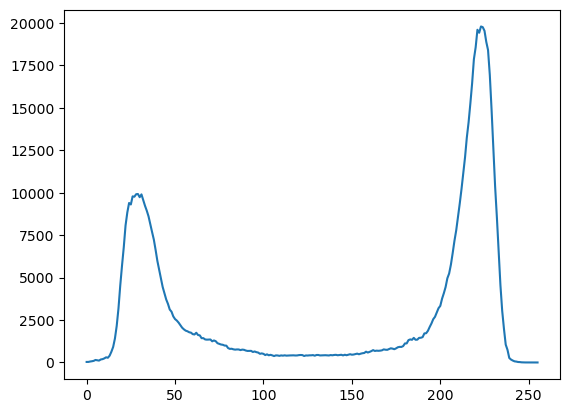

In [9]:
image=cv2.imread('ques.jpeg')
histogram=cv2.calcHist([image],[0],None,[256],[0,255])
plt.plot(histogram)
plt.show()
blur = cv2.blur(image,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
colored_image=np.zeros(image.shape)
lower_bound1=np.array([200,200,200])
upper_bound1=np.array([255,255,255])
color1=[255,0,0]
color_mask1=cv2.inRange(blur2,lower_bound1,upper_bound1)
lower_bound2=np.array([105,105,105])
upper_bound2=np.array([200,200,200])
color2=[0,0,255]
color_mask2=cv2.inRange(blur2,lower_bound2,upper_bound2)
lower_bound3=np.array([0,0,0])
upper_bound3=np.array([100,100,100])
color3=[0,255,0]
color_mask3=cv2.inRange(blur2,lower_bound3,upper_bound3)
colored_image[color_mask1>0]=color1
blur2[color_mask1>0]=color1
colored_image[color_mask2>0]=color2
blur2[color_mask2>0]=color2
colored_image[color_mask3>0]=color3
blur2[color_mask3>0]=color3
cv2.imshow("Mask region blue",color_mask1)
cv2.imshow("Mask region red",color_mask2)
cv2.imshow("Segemnted color region",colored_image)
cv2.imshow("Image",blur2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
'''image=cv2.imread('ques.jpeg')
blur = cv2.blur(image,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)
low_blue = np.array([5])
high_blue = np.array([170])
mask = cv2.inRange(hsv, low_blue, high_blue)
color_image=np.zeros(image.shape)
color_image[mask>0]=[0,255,0]
image[mask>0]=[0,255,0]
res = cv2.bitwise_and(image,image,mask=mask)
cv2.imshow("Segemnted color region",mask)
cv2.imshow("Image",image)'''

'image=cv2.imread(\'ques.jpeg\')\nblur = cv2.blur(image,(5,5))\nblur0=cv2.medianBlur(blur,5)\nblur1= cv2.GaussianBlur(blur0,(5,5),0)\nblur2= cv2.bilateralFilter(blur1,9,75,75)\nhsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)\nlow_blue = np.array([5])\nhigh_blue = np.array([170])\nmask = cv2.inRange(hsv, low_blue, high_blue)\ncolor_image=np.zeros(image.shape)\ncolor_image[mask>0]=[0,255,0]\nimage[mask>0]=[0,255,0]\nres = cv2.bitwise_and(image,image,mask=mask)\ncv2.imshow("Segemnted color region",mask)\ncv2.imshow("Image",image)'